In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### Functions

#### Read a show image

In [3]:
def img_read(file, type_conversion):
    id_image = file.astype(np.float32) / 255.0
    return cv.cvtColor(id_image, type_conversion) 



def apper_image(image, text : str):
    plt.imshow(image)
    plt.title(f'Image {text}')
    plt.axis('off')
    plt.show()

### IMAGE Treatment

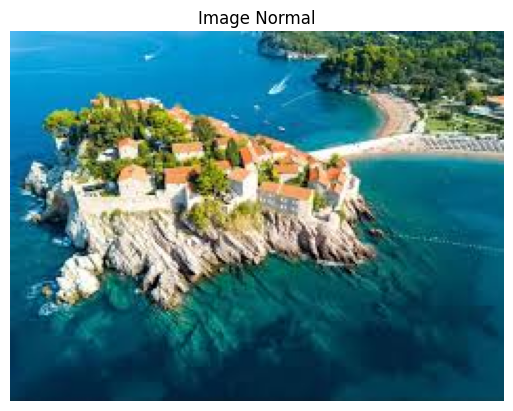

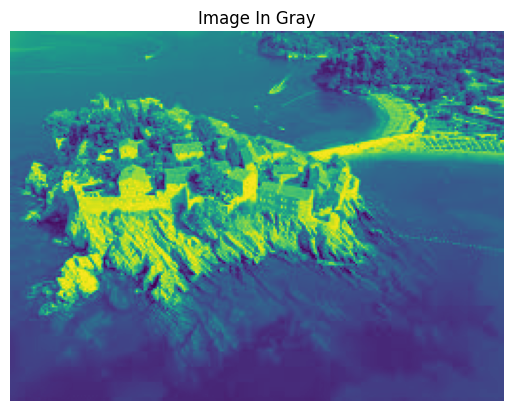

In [9]:
montenegro_beachs_img = cv.imread('images\montenegro.jpeg')
img_montenegro = img_read(montenegro_beachs_img, cv.COLOR_BGR2RGB)
img_montenegro_gray = img_read(img_montenegro, cv.COLOR_RGB2GRAY)
apper_image(img_montenegro, 'Normal')
apper_image(img_montenegro_gray, 'In Gray')

#### Separate img into RGB

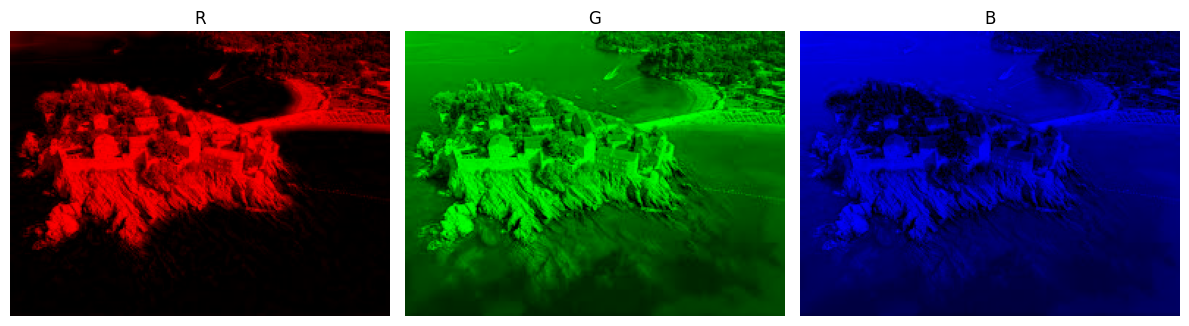

In [11]:
R = img_montenegro[:, :, 0]
G = img_montenegro[:, :, 1]
B = img_montenegro[:, :, 2]

zero_channel = np.zeros_like(R)

img_r = np.stack([R, zero_channel, zero_channel], axis = 2)
img_g = np.stack([zero_channel, G, zero_channel], axis = 2)
img_b = np.stack([zero_channel, zero_channel, B], axis = 2)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img_r)
plt.title('R')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_g)
plt.title('G')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_b)
plt.title('B')
plt.axis('off')

plt.tight_layout()
plt.show()

#### Selecting Only Gree

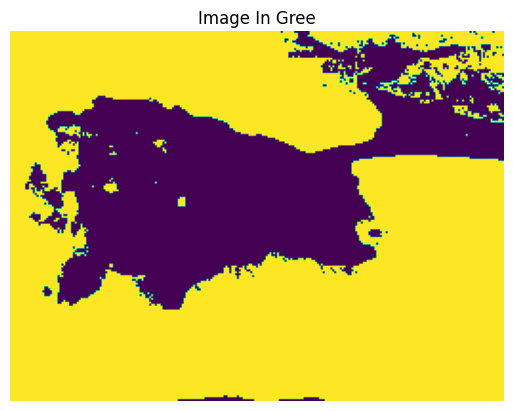

In [33]:
rgb_green = np.uint8([[[0, 255, 0]]])
hsv_green = cv.cvtColor(rgb_green, cv.COLOR_RGB2HSV)[0, 0, :] 

hsv_img = cv.cvtColor(montenegro_beachs_img, cv.COLOR_RGB2HSV_FULL)
lower_than = hsv_green - np.array([70, 200, 200])
upper_than = hsv_green + np.array([30, 0, 0])

mask = cv.inRange(hsv_img, lower_than, upper_than)

apper_image(mask, 'In Gree')


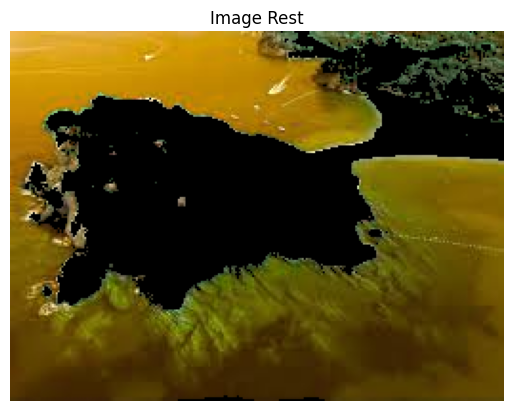

In [34]:
rgd_rest = cv.bitwise_and(montenegro_beachs_img, montenegro_beachs_img, mask=mask)
apper_image(rgd_rest, 'Rest')

#### a